### week2 ~ APIs !

<b>that is, _the-web-as-your-filesystem_ ...</b>  &nbsp;&nbsp; (hw2pr1.ipynb)

[the google doc with hw2's details](https://docs.google.com/document/d/1z4HwpUL1-ImGX3j-6bddyZAfdv2SkRQHRNhF5Cu3Fkk/edit?tab=t.0)
<hr>

In [29]:
#
# computing-styling trick of the day     (or, of the minute...)
#
# The setting for word-wrapping on the output is
#     "notebook.output.wordWrap": true,   (in your settings.json file or from Code ... Settings ...) 

print( list(range(100)) )


[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]


#### Let's see if you already have the requests library...

In [30]:
#
# see if we have the requests library...
#

import requests

In [31]:
%pip install requests

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: requests in c:\users\user\appdata\local\programs\python\python312\lib\site-packages (2.32.3)




[notice] A new release of pip is available: 23.2.1 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [32]:
#
# If you _don't_ have the requests library, let's install it!
#

# for me, it worked to uncomment and run this command, here in this cell:
# !pip3 install requests  OR   !pip install requests

# an alternative is to run, in a terminal, the command would be 
#  pip3 install requests  OR    pip install requests      (the ! is needed only if inside Python)

# It's very system-dependent how much you have to "restart" in order to use
# the new library (the notebook, VSCode, the Jupyter extension, etc.)

# Troubles?  Let us know!  We'll work on it with you...

In [33]:
#
# hopefully, this now works! (if so, running will succeed silently)
#

import requests

In [110]:
#
# let's try it on a simple webpage
#

#
# we assign the url and obtain the api-call result into result
#    Note that result will be an object that contains many fields (not a simple string)
# 

url = "https://www.cs.hmc.edu/~dodds/demo42.html"
result = requests.get(url)
result    

# if it succeeded, you should see <Response [200]>
# See the list of HTTP reponse codes for the full set!

<Response [404]>

[Here is Wikipedia's list of all HTTP response codes](https://en.wikipedia.org/wiki/List_of_HTTP_status_codes)
+ 100's: information
+ 200's: success           
+ 300's: redirects
+ 400's + 500's: errors

Perhaps familiar:  404 <br>
Especially fun:  418


In [35]:
#
# when exploring, you'll often obtain an unfamiliar object. 
# Here, we'll ask what type it is 
type(result)

requests.models.Response

How to access the data inside this object, ``result`` ?

One way: [Head over to the online documentation](https://requests.readthedocs.io/en/latest/api/#requests.Response)

In addition, you can "look around" in Python:

In [36]:
# here is one of the data members within the result
# it "remembers" (keeps track of) the url requested:
result.url

'https://www.cs.hmc.edu/~dodds/demo42.html'

In [37]:
# We can print all of the data members in an object with dir
# Since dir returns a list, we will grab that list and loop over it:
all_fields = dir(result)

for field in all_fields:
    if "_" not in field: 
        print(field)

close
connection
content
cookies
elapsed
encoding
headers
history
json
links
next
ok
raw
reason
request
text
url


In [44]:
#
# Let's try printing a few of those fields (data members): 
print(f"result.url         is {result.url}")  # the original url
print(f"result.raw         is {result.raw}")  # another object!
print(f"result.encoding    is {result.encoding}")  # utf-8 is very common
print(f"result.status_code is {result.status_code}")  # 200 is success!

result.url         is http://api.open-notify.org/iss-now.json
result.raw         is <urllib3.response.HTTPResponse object at 0x000001C70635E020>
result.encoding    is UTF-8
result.status_code is 502



                    <!doctype html>
                    <html>
                        <head>
                            <meta charset='utf-8'>
                            <title></title><style type='text/css'> @charset 'utf-8';
                        html, body          { height: 100%; margin: 0; }
                        body                { font-family: 'Helvetica Neue','Helvetica','Segoe UI', Arial, sans-serif; color:#5c5c5c; background: #fafafa}
                        a                   { text-decoration: none; color: #169ad5; }
                        a:focus             { outline: none; }
                        a:hover             { color: #878b97; text-decoration: none; }
                        a:hover .button     { background-color: #0E9FF4; }
                        .buttonrow          { float: left; width: 100%; }
                        .customcontent      { float: left; width: 100%; margin-bottom: 1em; }
                        .button             { float: left; fo
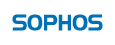
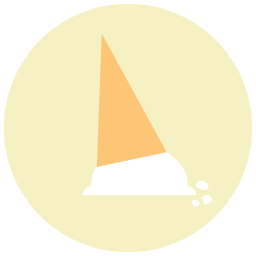
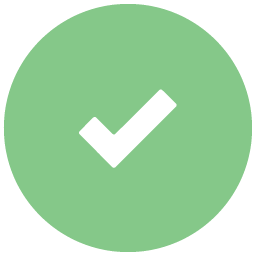
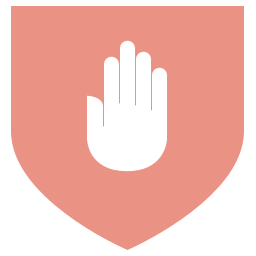
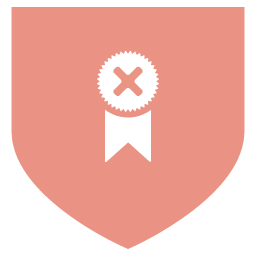
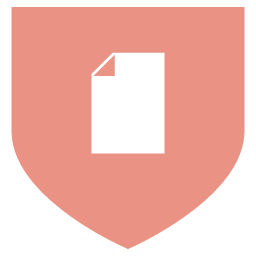
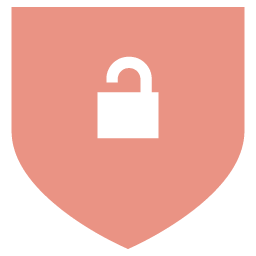
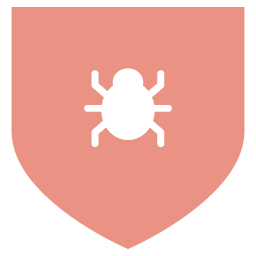
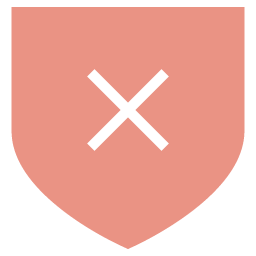
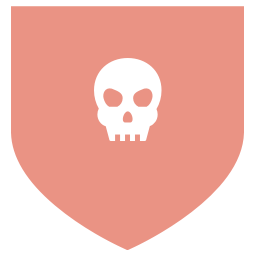
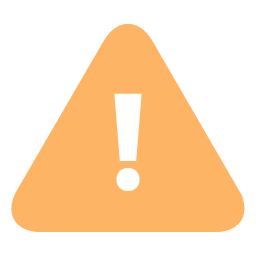
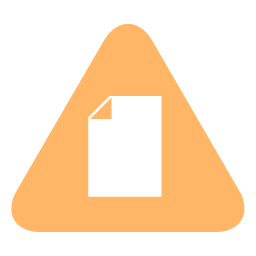
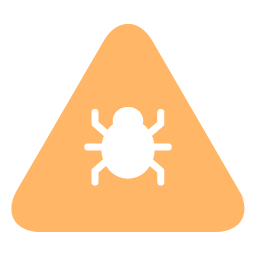
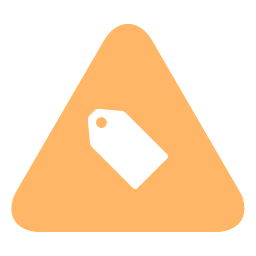
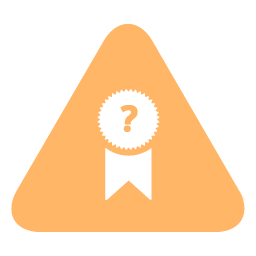
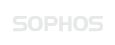
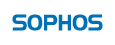

In [45]:
# In this case, the result is a text file (HTML) Let's see it!
contents = result.text
print(contents)

In [ ]:
# Yay!  
# This shows that you are able to "scrape" an arbitrary HTML page... 

# Now, we're off to more _structured_ data-gathering...

#### Traversing the world - and web - <i>without a browser</i>.   

<b>Using the ISS APIs</b> 

+ Here, you'll make some calls using `requests` to, first, the International Space Station API 
+ and, then, the US Geological Survey's earthquake API
+ "API" is short for "Application Programming Interface" 
  + Admittedly, this is not a very informative name:
  + The API is the set of services, which are functions and/or urls, provided by some software or site

Let's try it with the International Space Station api at [http://api.open-notify.org/iss-now.json](http://api.open-notify.org/iss-now.json)
+ [This page has documentation on the ISS API](http://open-notify.org/Open-Notify-API/ISS-Location-Now/)

In [46]:
#
# we assign the url and obtain the api-call result into result
#    Note that result will be an object that contains many fields (not a simple string)
# 

import requests

url = "http://api.open-notify.org/iss-now.json"   # this is sometimes called an "endpoint" ...
result = requests.get(url)
result    

# if it succeeds, you should see <Response [200]>

<Response [200]>

In [47]:
#
# Let's try printing those shorter fields from before:
print(f"result.url         is {result.url}")  # the original url
print(f"result.raw         is {result.raw}")  # another object!
print(f"result.encoding    is {result.encoding}")  # utf-8 is very common
print(f"result.status_code is {result.status_code}")  # 200 is success!

result.url         is http://api.open-notify.org/iss-now.json
result.raw         is <urllib3.response.HTTPResponse object at 0x000001C70636AB30>
result.encoding    is utf-8
result.status_code is 200


In [48]:
#
# In this case, we know the result is a JSON file, and we can obtain it that way:
json_contents = result.json()
print(json_contents)

# Remember:  json_contents will be a _dictionary_

{'message': 'success', 'timestamp': 1739386908, 'iss_position': {'longitude': '59.1489', 'latitude': '-50.7064'}}


In [106]:
#
# Let's re-remind ourselves how dictionaries work:

long1 = float(json_contents['iss_position']['longitude'])
lat1 = float(json_contents['iss_position']['latitude'])        # Challenge:  could we access the other components? What _types_ are they?!!

print(long1)
print(lat1)

59.1489
-50.7064


In [50]:
#
# In Python, we can use the resulting dictionary... let's see its keys:
print(list(json_contents.keys()))  

# Also, watch out for string vs. numeric types, e.g., for latitude and longitude.
# At heart, _all_ web data are strings... .

# These experiments will be helpful for problem 1, below :)

['message', 'timestamp', 'iss_position']


<font color="Coral"><b>Task 0a</b></font>  &nbsp;&nbsp; From here, 
+ extract the lat and CS35_Participant_2 of the ISS from ``json_contents``  (dictinoary practice!)
+ copy the ``haversine`` function from the assignment
+ find the lat/CS35_Participant_2 of Claremont (or grab it from the hw page! 😊 )
+ combine these to find out how far, in miles, the ISS is from Claremont  
+ <font size="-2">you could _imagine_ writing a function to do all this (no need to - we'll do it with earthquakes!)</font>

In [51]:
def haversine(lat1, long1, lat2, long2):
    """
    Calculate the great circle distance in kilometers between two points
    on the earth (specified in decimal degrees)
    """
    from math import radians, sin, cos, sqrt, asin  # this import is for the sin, cos, radians, ...
    # convert decimal degrees to radians
    long1, lat1, long2, lat2 = map(radians, [long1, lat1, long2, lat2])


    # haversine formula
    dlong = long2 - long1
    dlat = lat2 - lat1
    trig = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlong/2)**2
    # Radius of earth. Use 3956 for miles. 6371 for km.
    radius = 3956  # we'll use miles!
    return radius * 2 * asin(sqrt(trig))

long2 = 34.0967
lat2 = -117.7198

haversine(lat1, long1, lat2, long2)

4507.077921623413

## JSON

####  Let's make a brief JSON visit in Python

The library ``json`` allows us to create and read arbitrary JSON data.

In [52]:
# JSON is a javascript dictionary format -- almost the same as a Python dictionary:
data = { 'key':'value',  'fave':42,  'list':[5,6,7,{'mascot':'Aliiien'}] }
print(data)

# we can write in JSON format to a local file, named small42.json:
import json 

with open("small.json", "w") as f:
    json.dump( data, f )

{'key': 'value', 'fave': 42, 'list': [5, 6, 7, {'mascot': 'Aliiien'}]}


In [53]:
# We can also read from a json file
# The resulting data will be a _dictionary_:

with open("small.json", "r") as f:
    dictionary = json.load( f )

print(f"the {dictionary = }")

the dictionary = {'key': 'value', 'fave': 42, 'list': [5, 6, 7, {'mascot': 'Aliiien'}]}


In [54]:
# let's access this dictionary -- first, the keys:
list(dictionary.keys())   # How do we get 'Aliiien' from newdata?

['key', 'fave', 'list']

In [55]:
# Task: use the dictionary to obtain (a) 'value' , (b) 42 , (c) 'Aliiien'  [tricky!]

# remember that there are two ways to get the value from a key:
# way 1:  dictionary['key']            # errors if 'key' isn't present
# way 2:  dictionary.get('key')        # returns None if 'key' isn't present

dictionary['key']

'value'

Most of the time this will be done for us by the ``requests`` library. So, we will simply receive the dictionary of data sent.

Then, the trick is to "extract" the data fragments we want. (Sometimes it feels like forensics - or archaeology!) Try excavating items one **layer** at a time...

#### Remember: &nbsp; <i>not</i> every url returns json data...
+ The url [https://www.cs.hmc.edu/~dodds/demo.html](https://www.cs.hmc.edu/~dodds/demo.html) returns a plain-text file with _markup_ text
+ that is to say, with HTML tags, such as `<title>Title</title>` to designate the components of its content
+ HTML stands for _hypertext markup language_   
+ Often anything with tags similar to `<b>be bold!</b>` is called "markup." 

Let's try our 5C homepages: they're HTML, not JSON:

In [56]:
import requests 

# here, we will obtain plain-text results from a request
url = "https://www.cs.hmc.edu/~dodds/demo.html"  # try it + source
# url = "https://www.scrippscollege.edu/"          # another possible site...
# url = "https://www.pitzer.edu/"                  # another possible site...
# url = "https://www.cmc.edu/"                     # and another!
# url = "https://www.cgu.edu/"
result = requests.get(url)        
print(f"result is {result}")        # hopefully it's 200

result is <Response [200]>


In [58]:
# if the request was successful, the Response will be [200]. 
# Then, we can grab the text - or json - from the site:

text = result.text                  # provides the HTML page as a large string...
print(f"len(text) is {len(text)}")  # let's see how large the HTML page is... 

print("\nThe first 242 characters are\n")
print(text[:242])                  # we'll print the first few characters...  

# change this to text[:] to see the whole document...
# Notice that we can run many different analyses without having to re-call/re-scrape the page (this is good!)

len(text) is 744

The first 242 characters are

<html>
  <head>
    <title>My streamlined website</title>
  </head>
  <body>
    <h1> Welcome! </h1>
    <h2> The best numbers </h2>

    <div id="numberlist">
      <ol>
	<li class="number"> 35 </li>
	<li class="number"> 42 </li>
	<li class=


#### Declined requests!

Caution: <i>See this week's reading!</i>

#### For now let's focus on API calls providing JSON 
+ We're reading-aligned, as we should be!
+ The open-ended problem (the finale in this notebook) offers the _option_ of scraping raw html -- up to you...

<br>

<b>Let's try another ISS "endpoint" ~ one with all of the <i>people</i> in space.</b>

It's at this url:  [http://api.open-notify.org/astros.json](http://api.open-notify.org/astros.json)


In [59]:
#
# we assign the url and use requests.get to obtain the result into result_astro
#
#    Remember, result_astro will be an object that contains many fields (not a simple string)
# 

import requests

url = "http://api.open-notify.org/astros.json"   # this is sometimes called an "endpoint" ...
result_astro = requests.get(url)
result_astro

# if it succeeded, you should see <Response [200]>

<Response [200]>

In [60]:
# If the request succeeded, we know the result is a JSON file, and we can obtain it that way.
# Let's call our dictionary something more specific:

astronauts = result_astro.json()
print(astronauts)
d = astronauts     # d is shorter to type

# Remember:  d and astronauts will be a _dictionary_

note = """ here's yesterday's result - it _should_ be the same today!

{"people": [{"craft": "ISS", "name": "Oleg Kononenko"}, {"craft": "ISS", "name": "Nikolai Chub"},
{"craft": "ISS", "name": "Tracy Caldwell Dyson"}, {"craft": "ISS", "name": "Matthew Dominick"},
{"craft": "ISS", "name": "Michael Barratt"}, {"craft": "ISS", "name": "Jeanette Epps"},
{"craft": "ISS", "name": "Alexander Grebenkin"}, {"craft": "ISS", "name": "Butch Wilmore"},
{"craft": "ISS", "name": "Sunita Williams"}, {"craft": "Tiangong", "name": "Li Guangsu"},
{"craft": "Tiangong", "name": "Li Cong"}, {"craft": "Tiangong", "name": "Ye Guangfu"}], "number": 12, "message": "success"}
"""
""

{'people': [{'craft': 'ISS', 'name': 'Oleg Kononenko'}, {'craft': 'ISS', 'name': 'Nikolai Chub'}, {'craft': 'ISS', 'name': 'Tracy Caldwell Dyson'}, {'craft': 'ISS', 'name': 'Matthew Dominick'}, {'craft': 'ISS', 'name': 'Michael Barratt'}, {'craft': 'ISS', 'name': 'Jeanette Epps'}, {'craft': 'ISS', 'name': 'Alexander Grebenkin'}, {'craft': 'ISS', 'name': 'Butch Wilmore'}, {'craft': 'ISS', 'name': 'Sunita Williams'}, {'craft': 'Tiangong', 'name': 'Li Guangsu'}, {'craft': 'Tiangong', 'name': 'Li Cong'}, {'craft': 'Tiangong', 'name': 'Ye Guangfu'}], 'number': 12, 'message': 'success'}


''

This is pretty intricate. Let's try unpacking this - _parsing it_ - with an in-class break-out challenge.

In [61]:
#
# Cell to try out parsing d  (astronauts)
#

print(d['people'][4]['name'])
d['people'][4]['name'][3:0:-2]


Michael Barratt


'hi'

Let's compare with a whole other webservice: **earthquakes** 

<br>
<hr>
<br>

#### Earthquake data

[Here is the USGS Earthquate data API documentation](https://earthquake.usgs.gov/fdsnws/event/1/)

Notice that the "headline" is the URL: &nbsp; This is the <i>domain</i> from which we'll access data.
+ Underneath, there are several different <i>endpoints</i> 
+ We are going to focus on the <tt>count</tt> endpoint and the <tt>query</tt> endpoint
+ along with their parameters
  + the whole list of parameters is linked and available by scrolling down
  + that said, it's easy to miss (well, at least I did! :)

First, let's establish that, for these endpoints, we can make requests - by hand - in our browser!

Try this link: <br><br>  [https://earthquake.usgs.gov/fdsnws/event/1/count?format=geojson&minmagnitude=5.0&starttime=2024-01-01&endtime=2024-02-01](https://earthquake.usgs.gov/fdsnws/event/1/count?format=geojson&minmagnitude=5.0&starttime=2024-01-01&endtime=2024-02-01)

Ok! Let's parse this url. Requests in which there are parameters <i><b>in the url</b></i> are called GET requests:
+ the <b>endpoint</b> is the first part: ``https://earthquake.usgs.gov/fdsnws/event/1/count``
   + Notice that the forward-slashes are very much like our file-system trees from last week!
   + In fact, they usually <i>are</i> file-system trees. They're just on the <i>server</i> side, instead of our "client" side...
+ the <b>parameters</b> follow the question mark: ``format=geojson&minmagnitude=5.0&starttime=2024-01-01&endtime=2024-02-01``
   + There are four parameters here. Parameters are separated by the ampersand <tt>&amp;</tt> character.
   + Each one is in the format <tt>name=value</tt>  Here are the four:
   + ``format=geojson`` specifies the desired format of the returned data. ``geojson`` is JSON with geographic data.
   + ``minmagnitude=5.0`` specifies the minimum magnitude of earthquakes to consider. 5.0 is strong, if not always catastrophic.
   + ``starttime=2024-01-01`` specifies the earlier time-endpoint to consider. (Jan 1, 2024)
   + ``endtime=2024-02-01`` specifies the later time-endpoint to consider. (Feb 1, 2024)

My result was this:  ``{"count":134,"maxAllowed":20000}``
+ Earthquakes are always happening -- and they do get reclassified. So, the numbers can change - even in the past.

Try it, in your browser.

Also, try increasing the ``minmagnitude`` -- you'll see a progression of fewer and fewer quakes. (Fortunately!) 

<hr>

Then, try it using a short Python script:

In [62]:
#
# Let's try the  count  endpoint, with geojson format (json with geographical data)
#

url = "https://earthquake.usgs.gov/fdsnws/event/1/count?format=geojson&minmagnitude=5.0&starttime=2024-01-01&endtime=2024-02-01"

result = requests.get(url)                       # a named input, params, taking the value param_d, above
print(f"result is {result}")                     # hopefully, this is 200
print(f"the full url used was\n {result.url}")   # it's nice to be able to see this

result is <Response [200]>
the full url used was
 https://earthquake.usgs.gov/fdsnws/event/1/count?format=geojson&minmagnitude=5.0&starttime=2024-01-01&endtime=2024-02-01


In [63]:
# If it worked, we should be able to obtain the JSON. Remember, it's a dictionary. Let's use d:

d = result.json()

print(f"{d =}")

d ={'count': 133, 'maxAllowed': 20000}


#### Handling parameters separately...

It's awkward to include all the parameters as part of the url.

It's much more common to create a <i>dictionary</i> of the parameters, and then pass that to ``requests.get``

Here is an example:

In [64]:
#
# Here is the endpoint
#
url = "https://earthquake.usgs.gov/fdsnws/event/1/count"

# Let's use variables for three of the parameters:
min_mag = 4.2               # the minimum magnitude considered a quake (min_mag)
start_time = "2025-01-01"   # this is the year-month-day format of the start
finish_time = "2025-02-01"  # similar for the end

# we assemble a dictionary of our parameters, let's name it param_dictionary
# there are many more parameters available. The problems below ask you to explore them...
param_dictionary = { "format":"geojson",         # this is simply hard-coded to obtain json
                     "starttime":start_time,
                     "endtime":finish_time,
                     "minmagnitude":min_mag,
                     }

# Here, we use requests to make the request. The parameters will be added by this API call:
result = requests.get(url, params=param_dictionary)
print(f"result is {result}")                     # hopefully, this is 200
print(f"the full url used was\n {result.url}")   # this will include the parameters!

result is <Response [200]>
the full url used was
 https://earthquake.usgs.gov/fdsnws/event/1/count?format=geojson&starttime=2025-01-01&endtime=2025-02-01&minmagnitude=4.2


In [65]:
# If it worked, we should be able to see the json results:

d = result.json()
print(f"JSON returned was {d = }")

JSON returned was d = {'count': 1121, 'maxAllowed': 20000}


From here, it would be possible to write one or more loops and build an earthquake dataset. For example,
+ it would be possible to loop over the ``minmagnitude`` to get a distribution of different sized quakes (or a histogram)
+ it would be possible to loop over one of the <i>time-endpoints</i>
+ it would be possible to loop over one of the _other parameters_ e.g.,
  + you can specify a circle around a specific ``latitude`` and ``longitude`` with a ``maxradiuskm`` (the radius)
  + Claremont is at ``latitude=34.0967`` and ``longitude=-117.7198`` 

The next two cells have an example of a Claremont-centric quake-count question and answer:

In [66]:
#
# How many quakes of magnitude >= 4.2 have been within 300km of Claremont 
#     + in Jan 2025
#     + in Dec 2025
#
url = "https://earthquake.usgs.gov/fdsnws/event/1/count"

# Let's use variables for three of the parameters:
min_mag = 4.2               # the minimum magnitude considered a quake (min_mag)
start_time = "2025-01-01"   # this is the year-month-day format of the start
finish_time = "2025-02-01"  # similar for the end
# start_time = "2024-01-01"   # similar, but for a year-CS35_Participant_2 span...
# finish_time = "2025-01-01"  # similar for the end
radius_in_km = 300

# we assemble a dictionary of our parameters, let's name it param_dictionary
# there are many more parameters available. The problems below ask you to explore them...
param_dictionary = { "format":"geojson",         # this is simply hard-coded to obtain json
                     "starttime":start_time,
                     "endtime":finish_time,
                     "minmagnitude":min_mag,
                     "latitude":34.0967,
                     "longitude":-117.7198,
                     "maxradiuskm":radius_in_km,
                     }

# Here, we use requests to make the request. The parameters will be added by this API call:
result = requests.get(url, params=param_dictionary)
print(f"result is {result}")                     # hopefully, this is 200
print(f"the full url used was\n {result.url}")   # this will include the parameters!

# We'll extract the final result in another cell:

result is <Response [200]>
the full url used was
 https://earthquake.usgs.gov/fdsnws/event/1/count?format=geojson&starttime=2025-01-01&endtime=2025-02-01&minmagnitude=4.2&latitude=34.0967&longitude=-117.7198&maxradiuskm=300


In [67]:
# Let's finish up here:
quake_count = result.json()
print(f"{quake_count = }")

quake_count = {'count': 1, 'maxAllowed': 20000}


<font color="Coral"><b>Try this, task "0b"</b></font>  &nbsp;&nbsp; 
+ Would you expect more or fewer quakes if a minimum magnitude of 2.2 were used?
+ Try the above cells again for a minimum magnitude of 2.2 -- if that the difference you'd expect?

<font color="DodgerBlue"><b>Quake-counting Results:</b></font> 

#### Number of Claremont-centric quakes
  + <u>Overall</u> The API calls to the USGS showed that, within 300km of Claremont, there were
    + 1 quake of magnitude 4.2 or larger within 300km of Claremont in Jan '25
    + more quakes  of magitude 2.2 or larger within 300km of Claremont in Jan '25 <br><br>
  + <u>Reflection</u>: _This is not enough data to establish a trend. (I hope!)_ That said, for the hw, you should include a **loop** over at least 10 values, as well as a text-formatted set of values. (It's ok for the output values to be in the computational cell(s), not the markdown cell. The markdown is really for reflection on results than reporting of results.) <br><br>
  + <u>Opportunities</u>: In fact, there are lots of values over which the USGS API allows to vary. For example,  minmagnitude (or maxmagnitude), radius, location (lat/CS35_Participant_2), months (or other time-measurements) - and others. In addition, there is the chance to look at the details of each quake using the ``query`` endpoint. <br><br>

Looping over API calls to gather data will be one of the hw problems.

<hr>

#### The ``query`` endpoint

Let's see, too, that it's possible to obtain, not only a <i>count</i>, but also a <b>"full report"</b> of all of the earthquakes.

To do so, the only change needed is from the endpoint ``count`` to the endpoint ``query``

First, try it "by hand" -- by opening this url in your browser:

[https://earthquake.usgs.gov/fdsnws/event/1/query?format=geojson&minmagnitude=6.8&starttime=2024-01-01&endtime=2024-02-01](https://earthquake.usgs.gov/fdsnws/event/1/query?format=geojson&minmagnitude=6.8&starttime=2024-01-01&endtime=2024-02-01)

Take a look -- there is a lot more data!  

Next, let's try it programmatically:

In [102]:
#
# Here is the endpoint
#
url = "https://earthquake.usgs.gov/fdsnws/event/1/query"

# Let's use variables for three of the parameters:
min_mag = 7.5           # the minimum magnitude considered a quake (min_mag)
start_time = "2024-01-01"   # this is the year-month-day format of the start
finish_time = "2024-12-31"  # similar for the end

# we assemble a dictionary of our parameters, let's name it param_dictionary
# there are many more parameters available. The problems below ask you to explore them...
param_dictionary = { "format":"geojson",         # this is simply hard-coded to obtain json
                     "starttime":start_time,
                     "endtime":finish_time,
                     "minmagnitude":min_mag,
                     }

# Here, we use requests to make the request. The parameters will be added by this API call:
result = requests.get(url, params=param_dictionary)
print(f"result is {result}")                     # hopefully, this is 200
print(f"the full url used was\n {result.url}")   # this will include the parameters!

result is <Response [200]>
the full url used was
 https://earthquake.usgs.gov/fdsnws/event/1/query?format=geojson&starttime=2024-01-01&endtime=2024-12-31&minmagnitude=7.5


In [103]:
# If it worked, we should be able to see the json results:

d = result.json()
print(f"JSON returned was {d = }")

JSON returned was d = {'type': 'FeatureCollection', 'metadata': {'generated': 1739387808000, 'url': 'https://earthquake.usgs.gov/fdsnws/event/1/query?format=geojson&starttime=2024-01-01&endtime=2024-12-31&minmagnitude=7.5', 'title': 'USGS Earthquakes', 'status': 200, 'api': '1.14.1', 'count': 1}, 'features': [{'type': 'Feature', 'properties': {'mag': 7.5, 'place': '2024 Noto Peninsula, Japan Earthquake', 'time': 1704093009476, 'updated': 1732717030012, 'tz': None, 'url': 'https://earthquake.usgs.gov/earthquakes/eventpage/us6000m0xl', 'detail': 'https://earthquake.usgs.gov/fdsnws/event/1/query?eventid=us6000m0xl&format=geojson', 'felt': 354, 'cdi': 8.9, 'mmi': 8.793, 'alert': 'red', 'status': 'reviewed', 'tsunami': 1, 'sig': 2315, 'net': 'us', 'code': '6000m0xl', 'ids': ',pt24001001,at00s6kml3,us6000m0xl,', 'sources': ',pt,at,us,', 'types': ',dyfi,earthquake-name,finite-fault,general-text,ground-failure,impact-link,impact-text,internal-origin,losspager,moment-tensor,origin,phase-data,sh

In [104]:
#
# That's hard to read!
# Let's pretty-print it with the json library
#       Also, this version can be pasted into online formatters, e.g., https://jsonformatter.org/

import json 
nice_string = json.dumps(d)   # this outputs a "nicely formatted string" using double quotes
print(nice_string)



{"type": "FeatureCollection", "metadata": {"generated": 1739387808000, "url": "https://earthquake.usgs.gov/fdsnws/event/1/query?format=geojson&starttime=2024-01-01&endtime=2024-12-31&minmagnitude=7.5", "title": "USGS Earthquakes", "status": 200, "api": "1.14.1", "count": 1}, "features": [{"type": "Feature", "properties": {"mag": 7.5, "place": "2024 Noto Peninsula, Japan Earthquake", "time": 1704093009476, "updated": 1732717030012, "tz": null, "url": "https://earthquake.usgs.gov/earthquakes/eventpage/us6000m0xl", "detail": "https://earthquake.usgs.gov/fdsnws/event/1/query?eventid=us6000m0xl&format=geojson", "felt": 354, "cdi": 8.9, "mmi": 8.793, "alert": "red", "status": "reviewed", "tsunami": 1, "sig": 2315, "net": "us", "code": "6000m0xl", "ids": ",pt24001001,at00s6kml3,us6000m0xl,", "sources": ",pt,at,us,", "types": ",dyfi,earthquake-name,finite-fault,general-text,ground-failure,impact-link,impact-text,internal-origin,losspager,moment-tensor,origin,phase-data,shakemap,", "nst": 282, 

but, we can do better! 

the "dump string" function, json.dumps, can output the formatted version, too...


In [105]:
import json 
nicer_string = json.dumps(d, indent=4)   # We can specify the indentation. 
print(nicer_string)                      # It's another tree structure... !

{
    "type": "FeatureCollection",
    "metadata": {
        "generated": 1739387808000,
        "url": "https://earthquake.usgs.gov/fdsnws/event/1/query?format=geojson&starttime=2024-01-01&endtime=2024-12-31&minmagnitude=7.5",
        "title": "USGS Earthquakes",
        "status": 200,
        "api": "1.14.1",
        "count": 1
    },
    "features": [
        {
            "type": "Feature",
            "properties": {
                "mag": 7.5,
                "place": "2024 Noto Peninsula, Japan Earthquake",
                "time": 1704093009476,
                "updated": 1732717030012,
                "tz": null,
                "url": "https://earthquake.usgs.gov/earthquakes/eventpage/us6000m0xl",
                "detail": "https://earthquake.usgs.gov/fdsnws/event/1/query?eventid=us6000m0xl&format=geojson",
                "felt": 354,
                "cdi": 8.9,
                "mmi": 8.793,
                "alert": "red",
                "status": "reviewed",
               

<font color="Coral"><b>Try this, also for Task 0b</b></font>  &nbsp;&nbsp; 
+ Look through the response to find where and when the largest eathquake was, in the previous year
+ What was its magnitude?
+ (optional) Do you see a way that - just by making small changes and re-running - you could find the second-biggest quake of '24?  Perhaps try it...  🦔

+  2024 Noto Peninsula, Japan Earthquake at time 1704093009476 with magnitude 7.5

<br>
<hr>
<br>



#### Launching into hw2's challenges:
+ <font color="Coral"><b>Tasks1-2</b></font> &nbsp;&nbsp; ISS challenges:
  + ``ISS_now()`` which will find and return the ISS's lat/CS35_Participant_2 (as floats)
    + use the earlier examples as a starting point...
  + ``ISS_distance()`` which will return the distance of the ISS from a city of your choice (a constant city, not a variable). It can be Claremont, but doesn't have to be. This will require using the <i>haversine</i> distance for global lat/CS35_Participant_2 coordinates...
+ <font color="Coral"><b>Tasks3-4</b></font> &nbsp;&nbsp; Earthquake challenges:
  + ``Quake_loop()`` which will loop over a parameter of your choice, print a formatted list of quake-count data, and return that list
  + ``Quake_compare(place1, place2)`` which will ask - and answer - a comparative question about "quakiness" for two different places, using the quake data... 
    + Here, the goal is to define which of the two places is "quakiest."
    + Notice that the definition of "quakiest" is up to you...
    + The inputs, place1 and place2, can be lat/CS35_Participant_2 pairs - or strings, which then get looked up...

<br>

#### <font color="Coral"><b>Task5</b></font> &nbsp;&nbsp; Open-ended, two-hop challenge

Then, you'll choose or create an open-ended API task -- or create a variant of your own design from at least two APIs - or "scrapes" - of your choice.
+ The key constraint is to be sure you meaningfully use the  <font color="DodgerBlue">result</font>  from the first API call in order to customize the request of the second API call.
+ Then, with the result of that second API call, interpret the data obtained to make a final "statement" -- which can be anywhere amid serious, silly, surreal -- that combines the two API insights.
+ See below for a far-fetched superbowl-themed idea...




In [2]:
#
# hw2: ISS tasks 1 and 2 ...
# 
# Two functions:  ISS_now(), ISS_distance()

#
# Use the ISS examples above to write a function, named 
#     
#      ISS_now()
#
# that uses requests to return the current latitude and longitude -- as floating-point values -- right now.
# Be sure to test it! 

import requests

def ISS_now():
    url = "http://api.open-notify.org/iss-now.json"   # this is sometimes called an "endpoint" ...
    result = requests.get(url)
    result    
    json_contents = result.json()
    long1 = float(json_contents['iss_position']['longitude'])
    lat1 = float(json_contents['iss_position']['latitude'])
    return long1, lat1

ISS_now()

(-137.4178, 5.8459)

Feel free to create some new cells around this area to write and test ``ISS_now()`` ...

In [ ]:
# 
# Once your ISS_now() function is working, write a new function
#
#       ISS_distance()
#
# which uses ISS_now to obtain the lat/CS35_Participant_2 of the ISS and then
# uses the haversine distance (look up a Python implementation or use one of ours... :)
# to compute the ISS's distance from a city of your choice.
#
# The haversine distance computes the "great circle" distance from two points on the globe
#     using latitude and longitude  
#
def ISS_distance(long2, lat2):
    from math import radians, sin, cos, sqrt, asin  # this import is for the sin, cos, radians, ...
    
    long1, lat1 = ISS_now()
    # convert decimal degrees to radians
    long1, lat1, long2, lat2 = map(radians, [long1, lat1, long2, lat2])


    # haversine formula
    dlong = long2 - long1
    dlat = lat2 - lat1
    trig = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlong/2)**2
    # Radius of earth. Use 3956 for miles. 6371 for km.
    radius = 3956  # we'll use miles!
    return radius * 2 * asin(sqrt(trig))

ISS_distance(34.0967, -117.7198)


4718.761154245355

Feel free to create some new cells around this area to write and test ``ISS_distance()`` ...

In [ ]:
#
# Open-ended possibility:  
#    (a) create a new function ISS_distance(place) that takes in a place name
#    (b) find a service by which you can look up the lat + CS35_Participant_2 using the place name
#         (b*)  I'm not sure how to do this - it's exploratory! 
#    (c) then, continue with the previous computation to find the ISS distance! :) 
#

# The final problem of this hw2 is to take on _ONE_ open-ended possibility. 
#     (This ISS-themed one is only the first possibility.)
#     Others, below, involve earthquakes, or your own choice of API exploration...

#### USGS Challenges

Tasks 3 and 4 use the earthquake API

In [ ]:
#
# hw2: USGS Tasks 3 and 4 ...
# 
# Two functions:  Quake_loop(), Quake_compare(place1, place2)

#
# Use the USGS (earthquake) examples above to write a function, named 
#     
#      Quake_loop()
#
# that uses requests within a loop of your own design in order to
#   + obtain at least 10 distinct, comparable data elements (counts are encouraged; other items ok)
#   + see the assignment page for an example where the looping iterates over the _month_
#
#   + choose your favorite parameter(s) to vary, e.g., magnitude, time, radius, location, etc.
#   + it should collect all of those data elements into a list
#   + and render the list in a neatly formatted chart (f-strings welcome; not required)
#
#   + in addition, include a overall reflection on the results, as well as a comment on additional effort
#     that could expand your results (you need not run it), and any concerns or caveats about the data...
#   + feel free to copy-paste-edit the markdown "reflection-template," above  

import requests
import time


#
# Here is an example of using a for-loop with the USGS API
#
import requests
import time


def get_num_quakes(latitude, longitude, month, magnitude, radius):
   """ returns the number of quakes in month (of '24)
           of at least magnitude ...
   """


   url = "https://earthquake.usgs.gov/fdsnws/event/1/count"


   # Let's use variables for three of the parameters:
   min_mag = magnitude         # the minimum magnitude considered a quake (min_mag)
   start_time = f"2024-{month:02d}-01"   # this is the year-month-day format of the start
   finish_time = f"2024-{month+1:02d}-01"  # similar for the end (f-strings! :)


   # we assemble a dictionary of our parameters, let's name it param_dictionary
   # there are many more parameters available. The problems below ask you to explore them...
   param_dictionary = { "format": "geojson",
                        "starttime": start_time,
                        "endtime": finish_time,
                        "minmagnitude": magnitude,
                        "latitude": latitude,
                        "longitude": longitude,
                        "maxradiuskm": radius,
                       }


   # Here, we use requests to make the request. The parameters will be added by this API call:
   time.sleep(2)
   result = requests.get(url, params=param_dictionary)
   # print(f"result is {result}")                     # hopefully, this is 200
   # print(f"the full url used: {result.url}")   # this will include the parameters!
   d = result.json()
   number_of_quakes = d['count']
   return number_of_quakes




def Quake_loop():
    print(f"{'Month':<10} {'Mag':<10} {'Radius(km)':<12} {'Quakes':<10}")
    print("=" * 42)
    LoQ = []
    latitude = 34.0967
    longitude = -117.7198
    for month in range(1,11):
        magnitude = 1.0 + (month * 0.1)  # Vary magnitude slightly
        radius = 100 + (month * 10)  # Increase radius over months
        quake_count = get_num_quakes(latitude, longitude, month, magnitude, radius)

        LoQ.append((month, round(magnitude, 1), radius, quake_count))
        print(f"{month:<10} {round(magnitude,1):<10} {radius:<12} {quake_count:<10}")
        LoQ += [result]
    return LoQ

print(Quake_loop())

'''
I decide to use magnitude and raidus, increasing both by a small factor. I wanted to see the corrlation between how increaing raidus versus magnitiude would affect the counting.
I would be interested in graphing this and seeing the trends it tends to go into. I noticed it leveled out at the start then dipped, then went crazy. I wonder if 
increasing radius makes more quakes appear or magnitude. I can hypothesis its radius from the data, but I wonder how much would I need to increase magnitiude by to 
equal it out. 
'''

Month      Mag        Radius(km)   Quakes    
1          1.1        110          143       
2          1.2        120          160       
3          1.3        130          116       
4          1.4        140          113       
5          1.5        150          105       
6          1.6        160          79        
7          1.7        170          80        
8          1.8        180          403       
9          1.9        190          110       
10         2.0        200          54        
[(1, 1.1, 110, 143), 966, (2, 1.2, 120, 160), 966, (3, 1.3, 130, 116), 966, (4, 1.4, 140, 113), 966, (5, 1.5, 150, 105), 966, (6, 1.6, 160, 79), 966, (7, 1.7, 170, 80), 966, (8, 1.8, 180, 403), 966, (9, 1.9, 190, 110), 966, (10, 2.0, 200, 54), 966]


Feel free to create some new cells around this area to write and test ``Quake_loop()`` ...

In [19]:
# 
# Once your Quake_loop() function is working, write a new function
#
#       Quake_compare(place1, place2)
#
# where place1 should be a 2-element tuple:  (latitude1, longitude1)
# and  place2 should be a 2-element tuple:  (latitude2, longitude2)
#
# and then your function should compare which of the two places is "quakier" (not a real word)
# for a given time span (you choose), and a given strength-of-quakes (you choose), and
# for a specific radius around each of the two places (you choose)
#
# As is clear, there is lots of freedom to design a "comparison of quakiness" -- wonderful!
# Feel free to start somewhere, and tune the results.
#
# Your function should print the results it finds (in this case, it's not important to return
# and specific value -- though you're encouraged (not required) to create a helper function and 
# then call it twice for the two locations! (That helper function would need a return value!)
#
#

place1 = (34.05, -118.25)
place2 = (0.0, 0.0)

def Quake_compare(place1, place2):
    start_time = "2024-01-01"
    end_time = "2024-12-31"
    magnitude = 1  
    radius = 300

    lat1, long1 = place1
    lat2, long2 = place2

    quakesUno = get_num_quakes(lat1, long1, 1, magnitude, radius)
    quakesDos = get_num_quakes(lat2, long2, 1, magnitude, radius)

    if quakesUno > quakesDos:
        print(f"Location 1 ({lat1}, {long1}) is quakier!")
    elif quakesDos > quakesUno:
        print(f"Location 2 ({lat2}, {long2}) is quakier!")
    elif quakesUno == quakesDos:
        print("Both are the same amt of quakieness")
    else:
        print("error")

Quake_compare(place1, place2)

Location 1 (34.05, -118.25) is quakier!


Feel free to create some new cells around this area to write and test ``Quake_compare(place1, place2)`` ...

#### Final API challenge:  an open-ended, two-hop API task...

<font color="Coral">Key constraint: _Use two hops!_</font>  &nbsp;&nbsp; Be sure to dome something that uses two separate API calls, in which the results of the first affect the second - culminating in an aggregate, overall result.

Possibilities: 
  + You should use at least one other API. (See the hw2 page for links to many.)
      + The [Poke API](https://pokeapi.co/)  or [one of these](https://medium.com/codex/15-fun-and-interesting-apis-to-use-for-your-next-coding-project-in-2022-86a4ff3a2742) or [one of the many, many more!](https://github.com/public-apis/public-apis)
  + That said, <u><b>one</b></u> of the two can be ISS or USGS, as you used above.



<font size="-2">PS. My example of this is in ``superbowl_prediction.ipynb`` with the starter files. It used to be here, but it was too clutter-y... .</font>

<br><hr><br>

Big-picture, an important part of using API calls is gathering a _specific piece_ of data from an otherwise too-large ocean of raw material. That element then allows you to express a natural _next_ specific question, obtain its relevant data, and continue to build from there, with each round-trip branching into additional (possible) questions... .

<br>

Good luck API'ing!!

<br>



In [20]:
'''
My script calls in the PokeAPI and the Numbers API. A user can type in any Pokemon they want and whatever PokeDex number the Pokemon has, 
the script will grab that PokeDex number and find it in the Numbers API. The Number API contains trivia on many number, so it will 
give a fun fact about that number. 

Note: the Numbers API is not full-proof, as many numbers do not have any trivia on them and will give out boring answers, but the early generations of Pokemon should give manu fun facts.
'''
import requests

def pokeAPI(pokemonName):
    url = f"https://pokeapi.co/api/v2/pokemon/{pokemonName.lower()}/"
    response = requests.get(url)

    if response.status_code == 200:
        data = response.json()
        num = data["id"]
        return num
    else:
        print("Pokémon not found!")
        return None

def numbersAPI(number):
    url = f"http://numbersapi.com/{number}"
    response = requests.get(url)

    if response.status_code == 200:
        return response.text
    else:
        return None

pokemon = input("Enter a Pokemon name: ")
pokedex = pokeAPI(pokemon)

if pokedex:

    print(f"{pokemon} is Pokédex entry #{pokedex}.")

    numFact = numbersAPI(pokedex)
    if numFact:
        print(f"Fun fact about {pokedex}: {numFact}")



pikachu is Pokédex entry #25.
Fun fact about 25: 25 is the number of points needed to win a set in volleyball under rally scoring rules.
